# Gym Data

Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: DEC 01 2024

In [183]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


from sklearn.metrics import accuracy_score

In [184]:
import pandas as pd

# Load CSV data
file_path = "C:/Users/abu_s/Desktop/Data/gymdata.json"
data = pd.read_json(file_path)

# Display basic info about the dataset
print("Dataset Overview:\n", data.head())
print("\nDataset Info:\n")
data.info()


Dataset Overview:
    Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69             1313         Yoga            12.6   
1                      1.30              883         HIIT            33.9   
2                      1.11              677       Cardio            33.4   
3                      0.59              532     Strength            28.8   
4                      0.64              556     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level

In [185]:
# Display basic info about the dataset
print("Dataset Overview:\n", data.head())
print("\nDataset Info:\n")
data.info()

# Data Preprocessing
# Handle missing values (if any)
data = data.fillna(data.mean(numeric_only=True))

# Encode categorical variables
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data = pd.get_dummies(data, columns=['Workout_Type'], drop_first=True)


# Feature Engineering
# Categorize Experience Level
bins = [0, 2, 5, np.inf]
labels = ['Beginner', 'Intermediate', 'Advanced']
data['Experience_Category'] = pd.cut(data['Experience_Level'], bins=bins, labels=labels)
data['Experience_Category'] = data['Experience_Category'].map({
    'Beginner': 0, 'Intermediate': 1, 'Advanced': 2
})




Dataset Overview:
    Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69             1313         Yoga            12.6   
1                      1.30              883         HIIT            33.9   
2                      1.11              677       Cardio            33.4   
3                      0.59              532     Strength            28.8   
4                      0.64              556     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level

## Data Analysis

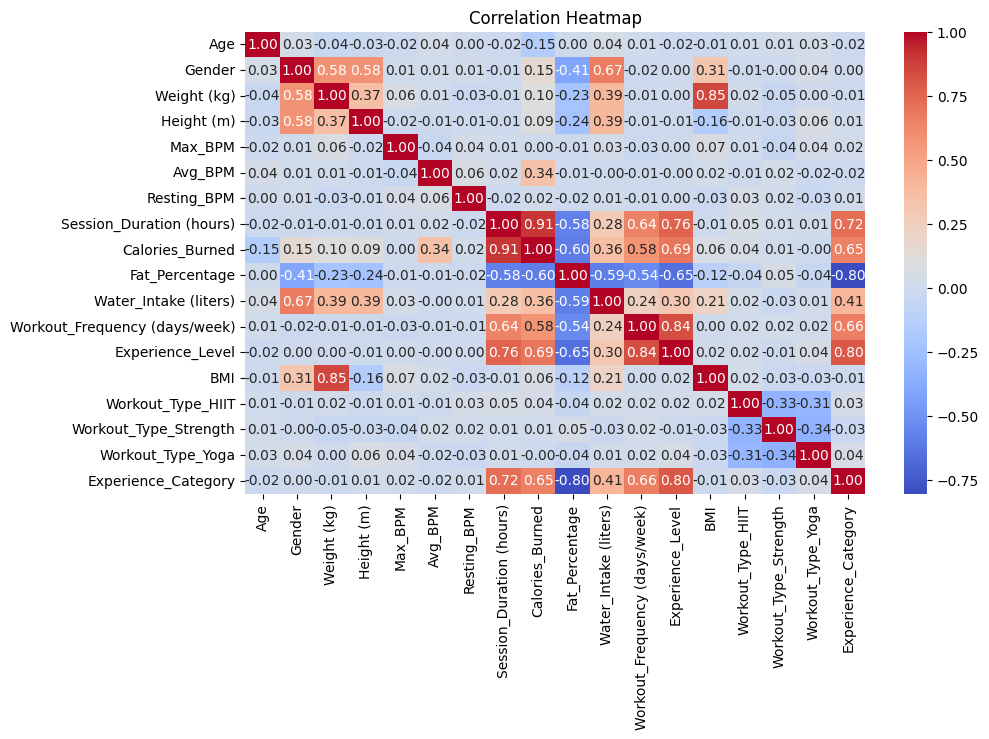

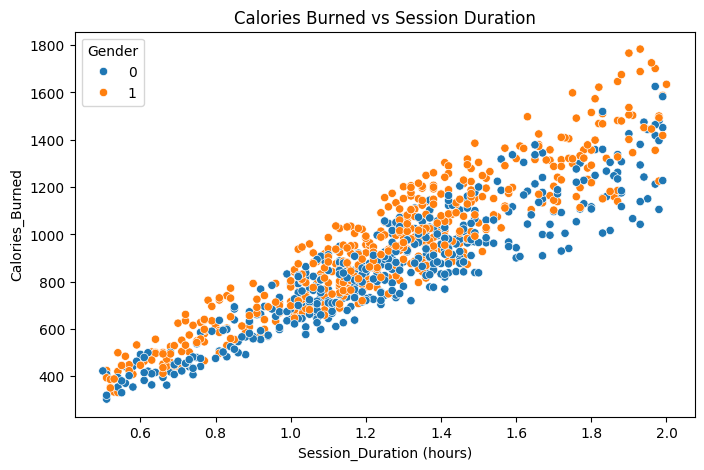

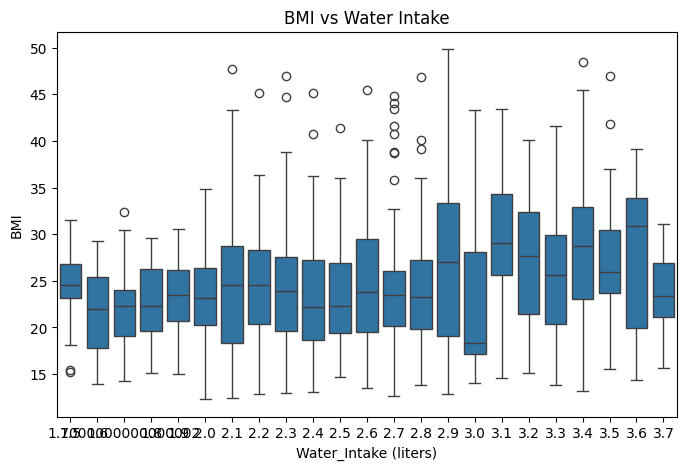

In [187]:


# Exploratory Data Analysis (EDA)
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter Plot: Calories Burned vs Session Duration
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Session_Duration (hours)', y='Calories_Burned', hue='Gender', data=data
)
plt.title('Calories Burned vs Session Duration')
plt.show()

# Boxplot: BMI vs Water Intake
plt.figure(figsize=(8, 5))
sns.boxplot(x='Water_Intake (liters)', y='BMI', data=data)
plt.title('BMI vs Water Intake')
plt.show()

## Machine Learning

## Regression

In [212]:
# Regression: Predict Calories Burned
X = data[['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Session_Duration (hours)', 'Workout_Frequency (days/week)']]
y = data['Calories_Burned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [216]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [220]:
# Evaluate predictions
print("Classification Report:\n", classification_report(y_test_class, class_predictions))
accuracy = accuracy_score(y_test_class, class_predictions)
print(f"Model Accuracy: {accuracy:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       153
           1       0.88      0.83      0.85        42

    accuracy                           0.94       195
   macro avg       0.91      0.90      0.91       195
weighted avg       0.94      0.94      0.94       195

Model Accuracy: 0.94


### Classification RandomForest

In [192]:
# Classification: Predict Experience Category
X_class = data[['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Workout_Frequency (days/week)']]
y_class = data['Experience_Category']



In [193]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)



In [194]:
clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train_class, y_train_class)



RandomForestClassifier(random_state=42)

In [195]:
# Predict on the test set
class_predictions = clf_model.predict(X_test_class)

# Evaluate predictions
print("Classification Report:\n", classification_report(y_test_class, class_predictions))
accuracy = accuracy_score(y_test_class, class_predictions)
print(f"Model Accuracy: {accuracy:.2f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       153
           1       0.88      0.83      0.85        42

    accuracy                           0.94       195
   macro avg       0.91      0.90      0.91       195
weighted avg       0.94      0.94      0.94       195

Model Accuracy: 0.94


In [196]:
# Calculate accuracy
accuracy = accuracy_score(y_test_class, class_predictions)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.94


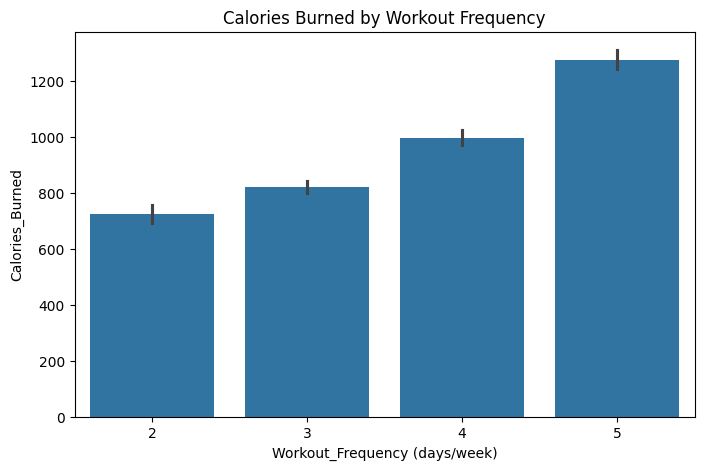

In [197]:
# Save Visualizations (Optional)
plt.figure(figsize=(8, 5))
sns.barplot(x='Workout_Frequency (days/week)', y='Calories_Burned', data=data)
plt.title('Calories Burned by Workout Frequency')
plt.savefig('calories_by_frequency.png')
plt.show()

# Dashboard Creation (use Dash or Tableau for interactivity)
# Export cleaned data to CSV for use in external tools
data.to_csv('cleaned_fitness_data.csv', index=False)